In [1]:
import numpy as np
import scipy.stats as scstats
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

## Problem 1

Each game consists of $n$ Bernoulli trials with probability of success $p$ and that of loss $q = 1 - p$. If we start with an amount $c$ then at the end of the game we will have $c \times g^s \times l^{n-s}$, where $g$ is gain on success, $l$ is the loss and $s$ is the number of successes. Thus, our random variable is $Y = r(X)$, where $X$ is a Bernoulli random variable and $r(s) = g^s l^{n-s}$. Therefore,
$$
E(Y) = \int r(x)dF = \sum_{s=0}^n p(X=s)r(s),
$$
since
$$
p(s) = \sum_{s=0}^n \binom{n}{s}p^s q^{n-s} 
$$
we have
$$
E(Y) = \sum_{s=0}^n (gp)^s (lq)^{n-s} = (gp + lq)^n.
$$

If $g = 2$, $l = 1/2$ and $p = 1/2$, the expected amount is $(5/4)^n c$.

In [4]:
nGames = 10000
nTrials = 30 # Each game has these many Bernoulli trials.
outcomes = rng.binomial(n=1, p=0.5, size=(nGames, nTrials)) 
initAmount = 1.0

def payoffFactor(outcome: int) -> float:
    return 2 if outcome == 1 else 0.5

finalAmounts = [initAmount * np.prod([payoffFactor(n) for n in outcomes[i]]) for i in range(nGames)]
print(f'Actual payoff = {np.round(np.mean(finalAmounts))}')
print(f'Theoretical payoff = {np.round((5/4)**nTrials)}')

Actual payoff = 582.0
Theoretical payoff = 808.0


The actual and theoretical values will get closer as we play more games, that is, as value of `nGames` is increased.

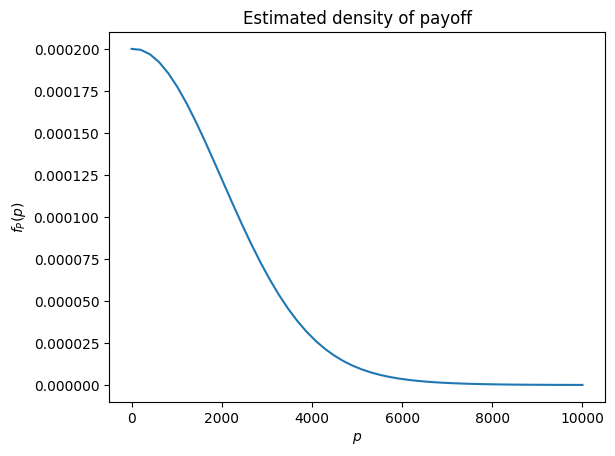

In [5]:
density = scstats.gaussian_kde(finalAmounts)
X = np.linspace(0, nGames)
Y = density.evaluate(X)
plt.plot(X, Y)
plt.xlabel(r'$p$')
plt.ylabel(r'$f_P(p)$')
_ = plt.title('Estimated density of payoff')

We will now compute the variance of payoff. To do that, we first need to compute $E(Y^2)$. Since $Y = cg^s l^{n-s}$, $Y^2 = c^2g^{2s}l^{2(n-s)}$ and
$$
E(Y^2) = \sum_{s=0}^n p(X=s) Y^2 = \sum_{s=0}^n\binom{n}{s} p^s q^{n-s} c^2 g^{2s}l^{2(n-s)} = c^2\sum_{s=0}^n (pg^2)^s (ql^2)^{n-s} = c^2(pg^2 + ql^2)^n.
$$
For $p = 1/2, g = 2, l = 1/2$,
$$
E(Y^2) = c^2\left(\frac{17}{8}\right)^n.
$$
Therefore, the variance of $Y$ is
$$
\text{Var}(Y) = E(Y^2) - E^2(Y) = c^2\left(\left(\frac{17}{8}\right)^n - \left(\frac{25}{16}\right)^n\right)
$$

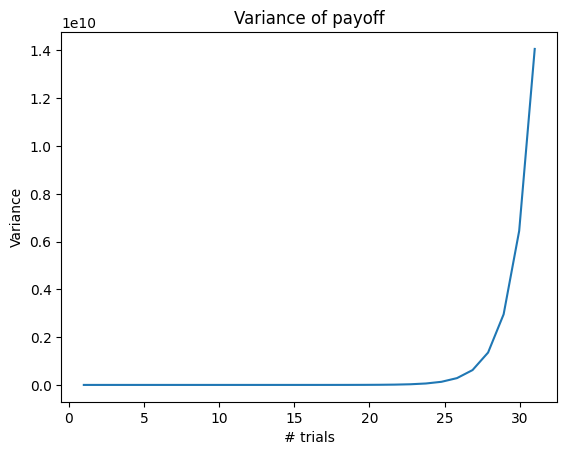

In [8]:
N = np.linspace(start=1, stop=nTrials + 1, num=nTrials)
V = [(17/8)**n - (25/16)**n for n in N]
plt.plot(N, V)
plt.xlabel('# trials')
plt.ylabel('Variance')
_ = plt.title('Variance of payoff')

In [9]:
varRatio = V[nTrials - 1]/np.var(finalAmounts)
print(f'The ratio of theoretical to measured variance is {np.round(varRatio, 2)}.')

The ratio of theoretical to measured variance is 93.45.


## Problem 3

In [10]:
nSamples = 20
nTrials = 1000
Ys = [max(rng.uniform(low=0, high=1, size=nSamples)) for n in range(nTrials)]

Given that $Y = \max\{X_1, \ldots, X_n\}$ so that $F_Y(y) = P(Y \le y) = P(X_1 \le y, \ldots X_n \le y) = y^n$ and hence the density is
$$
f_Y(y) = \frac{dF_Y}{dy} = ny^{n-1}.
$$
The mean value of $Y$ is
$$
E(Y) = \int_0^1 yf_Y(y)dy = \frac{n}{n+1}.
$$

$$
E(Y^2) = \int_0^1 y^2f_Y(y)dy = \frac{n}{n+2}
$$
so that
$$
\text{Var}(Y) = \frac{n}{n+2} - \frac{n^2}{(n+1)^2}
$$

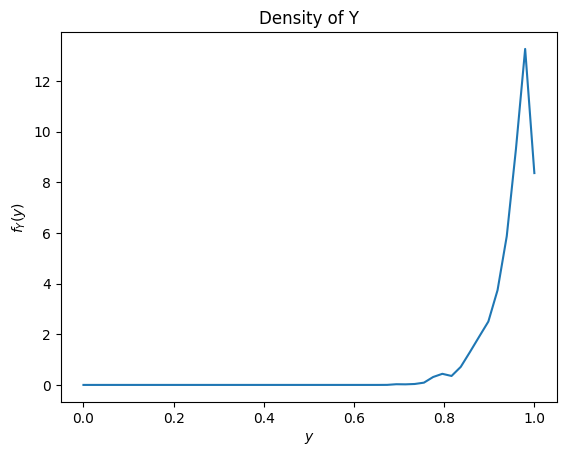

In [11]:
density = scstats.gaussian_kde(Ys)
X = np.linspace(0, 1)
Y = density.evaluate(X)
plt.plot(X, Y)
plt.xlabel(r'$y$')
plt.ylabel(r'$f_Y(y)$')
_ = plt.title('Density of Y')

In [12]:
print(f'Empirical mean = {np.mean(Ys)}')
print(f'Theoretical mean = {nSamples/(nSamples + 1)}')

Empirical mean = 0.9517763563016831
Theoretical mean = 0.9523809523809523


In [13]:
thVariance = nSamples/(nSamples + 2) - nSamples**2/(nSamples + 1)**2
print(f'Empirical mean = {np.mean(Ys)}')
print(f'Theoretical mean = {nSamples/(nSamples + 1)}')

Empirical mean = 0.9517763563016831
Theoretical mean = 0.9523809523809523


## Problem 4

This problem is similar to the first one except that instead of taking a product of terms for each outcome of a coin-toss we take the sum. We let $d$ be the distance traversed from the starting point and choose its initial value to be $0$. Let $D$ be the random variable representing the distance traversed from the starting point. Then $D$ is a function of $X$, the Bernoulli random variable. 
$$
D(x) = \begin{cases}
1 \text{ if } x = 1 \\
-1 \text{ if } x = 0.
\end{cases}
$$
If there are $s$ succees in $n$ trials then the distance travelled is $s - (n - s) = 2s - n$. Therefore,
$$
E(D) = \sum_{s=0}^n P(X = s)(2s - n) = \sum_{s=0}^n \binom{n}{s}p^s q^{n-s}(2s - n) = 2\sum_{s=0}^n s\binom{n}{s} - n\sum_{s=0}^n\binom{n}{s}p^sq^{n-s} = 
2\sum_{s=0}^n s\binom{n}{s}p^sq^{n-s} - n.
$$

We can evaluate the first term by expanding the sum.
$$
\sum_{s=0}^n s\binom{n}{s}p^sq^{n-s} = \sum_{s=0}^n s\frac{n!}{s!(n-s)!}p^sq^{n-s} = \sum_{s=1}^n s\frac{n!}{s!(n-s)!}p^sq^{n-s},
$$
because the first term vanishes. (Note the change in the range of summation.) So that 
$$\tag{1}
\sum_{s=0}^n s\binom{n}{s}p^sq^{n-s} = \sum_{s=1}^n \frac{n!}{(s-1)!(n-s)!}p^sq^{n-s} = np\sum_{s=1}^n\binom{n-1}{s-1}p^{s-1}q^{n-1 -(s-1)} = 
np\sum_{s=0}^{n-1}\binom{n-1}{s}p^{s}q^{n-1-s} = np.
$$
$$
E(D) = 2pn - n = n(2p - 1) .
$$
If $p = 1/2$, $E(D) = 0$.

The variance computations are similar, but a little tedious. We first compute $E(D^2)$, which is
$$
E(D^2) = \sum_{s=0}^n P(X = s)(2s - n)^2 = 4\sum_{s=0}^n s^2\binom{n}{s}p^sq^{n-1} - 4n\sum_{s=0}^n s\binom{n}{s}p^sq^{n-s} + n^2 = 4\sum_{s=0}^n s^2\binom{n}{s}p^sq^{n-1} - 4n^p + n^2,
$$
where we used equation (1). We now evaluate the first term.
$$
\sum_{s=0}^n s^2\binom{n}{s}p^sq^{n-1} = np\sum_{s=1}^n s\binom{n-1}{s-1}p^{s-1}q^{n-s}.
$$
Make the transformation $s - 1 \mapsto t$ so that $t$ ranges from $1$ to $n-1$. Thus,
$$
\sum_{s=0}^n s^2\binom{n}{s}p^sq^{n-1} = np\sum_{t=0}^{n-1} (t + 1)\binom{n-1}{t}p^{t}q^{n-1-t} = np((n-1)p + 1) = np(np + 1 - p)
$$
Therefore,
$$
E(D^2) = 4n^2p^2 + 4npq - 4np^2 + n^2
$$
so that
$$
\text{Var}(D) = 4n^2p^2 - 4np^2 + n^2 - n^2(2p - 1)^2 = 4npq.
$$
If $p = 1/2$, $\text{Var}(D) = n$.

In [14]:
nGames = 10000
nTrials = 30 # Each game has these many Bernoulli trials.
outcomes = rng.binomial(n=1, p=0.5, size=(nGames, nTrials)) 
initValue = 0

def step(outcome: int) -> float:
    return 1 if outcome == 1 else -1

distance = [initValue + np.sum([step(n) for n in outcomes[i]]) for i in range(nGames)]
print(f'Empirical mean = {np.round(np.mean(distance), 2)}')
print('Theoretical mean = 0.')
print(f'Empirical variance = {np.round(np.var(distance), 2)}')
print(f'Theoretical variance = {nTrials}')

Empirical mean = -0.0
Theoretical mean = 0.
Empirical variance = 29.78
Theoretical variance = 30


## Problem 9

In [15]:
X = rng.normal(loc=0, scale=1, size=10000)
Y = np.cumsum(X)
XBar = Y/np.linspace(1, 10001, 10000)

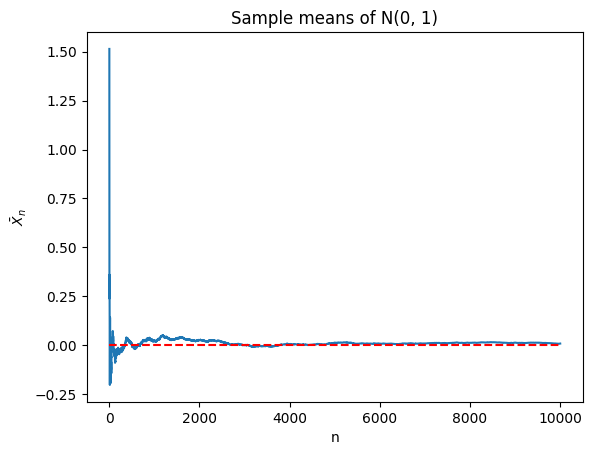

In [16]:
plt.plot(np.linspace(1, 10001, 10000), XBar)
plt.hlines(y=0, xmin=0,xmax=10000, linestyles='dashed', color='red')
plt.xlabel('n')
plt.ylabel(r'$\bar{X}_n$')
_ = plt.title('Sample means of N(0, 1)')

## Problem 11

In [17]:
nGames = 4
nTrials = 10000 # Each game has these many Bernoulli trials.
outcomes = rng.binomial(n=1, p=0.5, size=(nGames, nTrials)) 
initValue = 0
outcomes[outcomes == 0] = -1

In [24]:
Ys = np.cumsum(outcomes, axis=1)
X = [n for n in range(nTrials)]

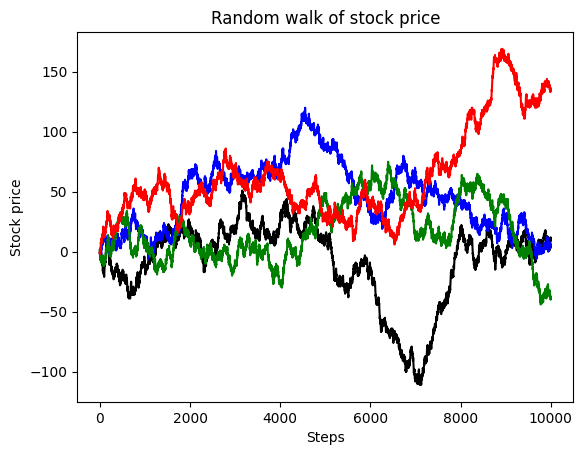

In [27]:
plt.plot(X, Ys[0, :], color='black')
plt.plot(X, Ys[1, :], color='blue')
plt.plot(X, Ys[2, :], color='green')
plt.plot(X, Ys[3, :], color='red')
plt.xlabel('Steps')
plt.ylabel('Stock price')
_ = plt.title('Random walk of stock price')

In [31]:
means = np.mean(outcomes, axis=1)
variances = np.var(outcomes, axis=1)

print(means)
print(variances)

[ 0.001   0.0004 -0.0038  0.0136]
[0.999999   0.99999984 0.99998556 0.99981504]


Out of curiosity, I checked if the Kolmogorv-Smirnov test thinks that the four distributions are different. They indeed are.

In [33]:
for i in range(Ys.shape[0]):
    for j in range(i + 1, Ys.shape[0]):
        res = scstats.ks_2samp(Ys[i, :], Ys[j, :])
        if res.pvalue >= 0.05:
            print('Cannot reject the null hypothesis that the two series are same.')
        else:
            print(f'Series {i} and {j} are different')

Series 0 and 1 are different
Series 0 and 2 are different
Series 0 and 3 are different
Series 1 and 2 are different
Series 1 and 3 are different
Series 2 and 3 are different


But the four binomial distributions are rightly considered to be the same.

In [35]:
for i in range(outcomes.shape[0]):
    for j in range(i + 1, outcomes.shape[0]):
        res = scstats.ks_2samp(outcomes[i, :], outcomes[j, :], method='asymp')
        if res.pvalue >= 0.05:
            print('Cannot reject the null hypothesis that the two series are same.')
        else:
            print(f'Series {i} and {j} are different')

Cannot reject the null hypothesis that the two series are same.
Cannot reject the null hypothesis that the two series are same.
Cannot reject the null hypothesis that the two series are same.
Cannot reject the null hypothesis that the two series are same.
Cannot reject the null hypothesis that the two series are same.
Cannot reject the null hypothesis that the two series are same.


## Problem 13

In [51]:
X = rng.binomial(n=1, p=0.5, size=100)
Y = [rng.uniform(low=0, high=1, size=1)[0] if X[n] == 1 else rng.uniform(low=3, high=4, size=1)[0] for n in range(len(X))]

In [55]:
empMean = np.round(np.mean(Y), 3)
empVar = np.round(np.var(Y), 3)

In [56]:
p = 0.5
q = 1 - p
thMean = (p + 7*q)/2
thVar = (p + 37*q)/3 - (p + 7*q)**2/4

In [57]:
print(f'Empirical mean: {empMean}, theoretical mean: {thMean}')
print(f'Empirical variance: {empVar}, theoretical mean: {thVar}')

Empirical mean: 2.086, theoretical mean: 2.0
Empirical variance: 2.339, theoretical mean: 2.333333333333333


## Problem 19

In [4]:
X = rng.uniform(low=0.0, high=1.0, size=100)

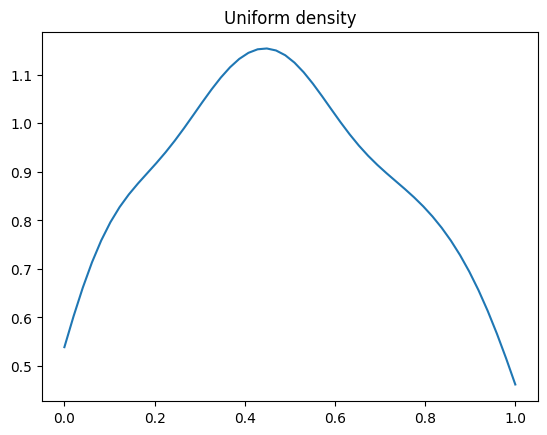

In [6]:
density = scstats.gaussian_kde(X)
p = np.linspace(start=0, stop=1, num=50)
plt.plot(p, density.evaluate(p))
_ = plt.title('Uniform density')

In [7]:
allMeans = [np.mean(X[0:n]) for n in range(1, 100)]
allVars =  [np.var(X[0:n]) for n in range(1, 100)]

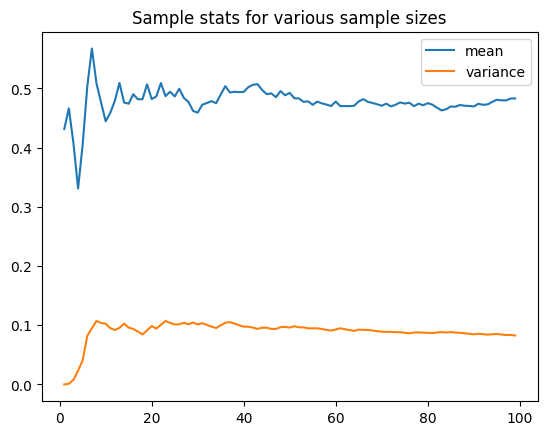

In [8]:
plt.plot([n for n in range(1, 100)], allMeans, label='mean')
plt.plot([n for n in range(1, 100)], allVars, label='variance')
plt.legend()
_ = plt.title('Sample stats for various sample sizes')

In [13]:
nSamples = 5000
Xbar1 = [np.mean(rng.uniform(size=1)) for i in range(nSamples)]
Xbar5 = [np.mean(rng.uniform(size=5)) for i in range(nSamples)]
Xbar25 = [np.mean(rng.uniform(size=25)) for i in range(nSamples)]
Xbar100 = [np.mean(rng.uniform(size=100)) for i in range(nSamples)]

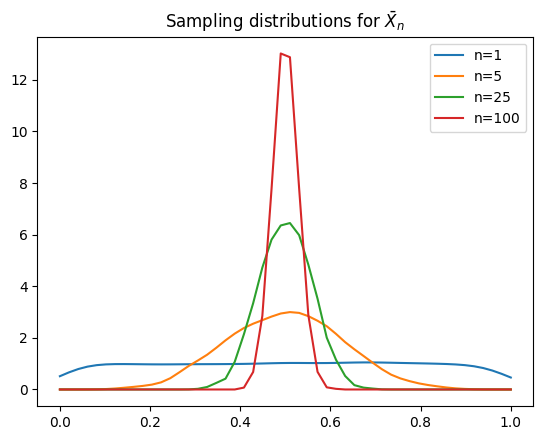

In [14]:
densityXbar1 = scstats.gaussian_kde(Xbar1)
densityXbar5 = scstats.gaussian_kde(Xbar5)
densityXbar25 = scstats.gaussian_kde(Xbar25)
densityXbar100 = scstats.gaussian_kde(Xbar100)
p = np.linspace(0, 1)

plt.plot(p, densityXbar1.evaluate(p), label='n=1')
plt.plot(p, densityXbar5.evaluate(p), label='n=5')
plt.plot(p, densityXbar25.evaluate(p), label='n=25')
plt.plot(p, densityXbar100.evaluate(p), label='n=100')
plt.legend()
_ = plt.title(r'Sampling distributions for $\bar{X}_n$')

## Ptoblem 22

In [6]:
a = 0.4
b = 0.8
sampleSize = 1000
X = rng.uniform(low=0, high=1, size=sampleSize)
Y = [1 if X[n] < b else 0 for n in range(sampleSize)]
Z = [1 if X[n] > a else 0 for n in range(sampleSize)]
YZ = [Y[i] * Z[i] for i in range(sampleSize)]

In [9]:
meanX = np.mean(X)
meanY = np.mean(Y)
meanZ = np.mean(Z)
meanYZ = np.mean(YZ)

In [10]:
print(f'Mean of X = {meanX}')
print(f'Mean of Y = {meanY}')
print(f'Mean of Z = {meanZ}')
print(f'Mean of Y*Z = {meanYZ}')
print(f'(Mean of Y) x (Mean of Z)  = {meanY * meanZ}')

Mean of X = 0.5007814307174283
Mean of Y = 0.794
Mean of Z = 0.586
Mean of Y*Z = 0.38
(Mean of Y) x (Mean of Z)  = 0.465284


The random variables $Y$ and $Z$ are **not independent**.